In [1]:
import os
os.getcwd()

'/home/labsuser'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score , accuracy_score , confusion_matrix

In [3]:
df = pd.read_csv("health care diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

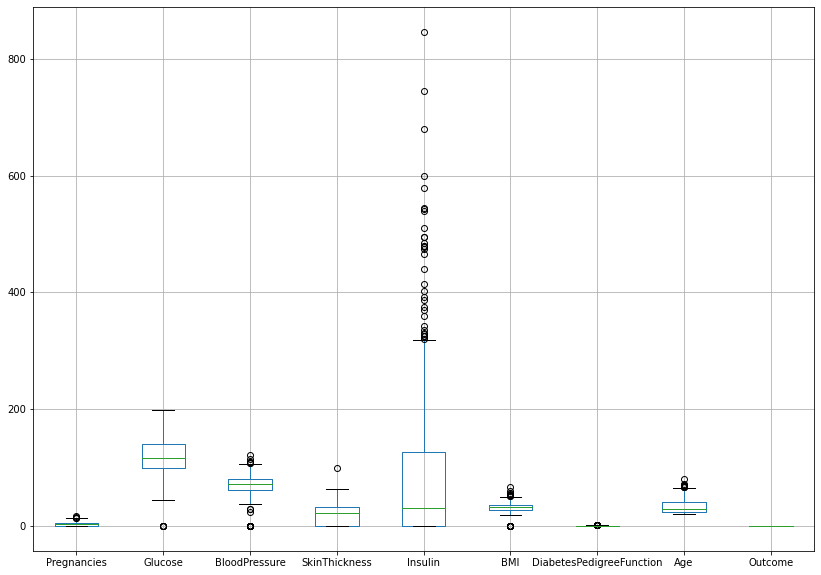

In [11]:
plt.figure(figsize = (14,10))
df.boxplot()

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df[df[['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']]==0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    print(i)
    print(df[i].value_counts(normalize=True)[0],'\n\n')

Glucose
0.006510416666666667 


BloodPressure
0.045572916666666664 


SkinThickness
0.2955729166666667 


Insulin
0.4869791666666667 


BMI
0.014322916666666666 




<AxesSubplot:>

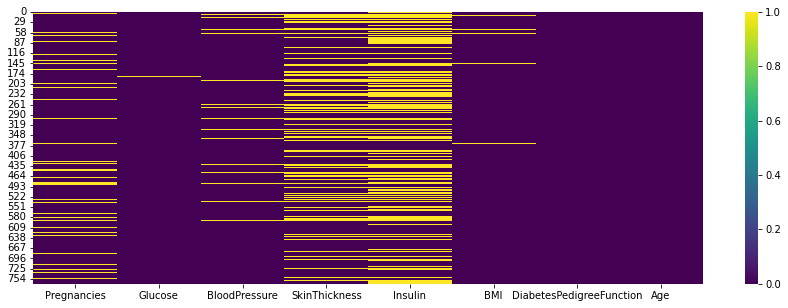

In [15]:
# Checking the missing values using the heat map plot.

df1 = df.drop('Outcome',axis=1)
df2 = df1.replace(0,np.nan)
plt.figure(figsize=(15,5))
sns.heatmap(df2.isna(),cmap = 'viridis')

In [16]:
df.shape

(768, 9)

In [17]:
df2.shape

(768, 8)

Glucose
BloodPressure
SkinThickness
Insulin
BMI


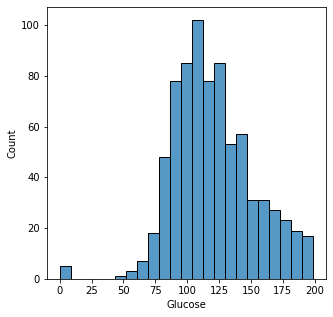

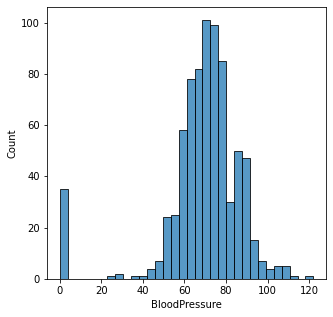

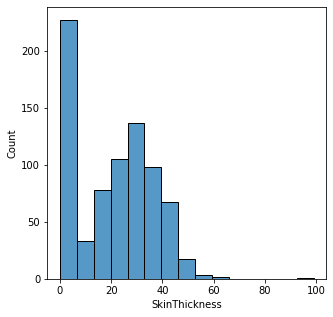

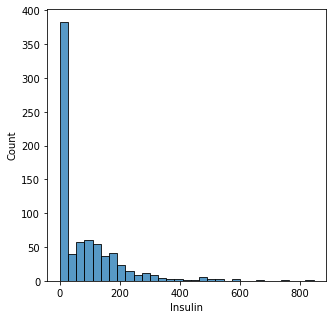

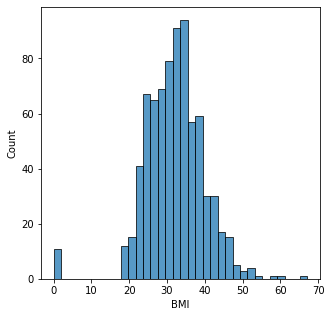

In [18]:
### Checking the histogram to treat the missing values statistically.
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    print(i)
    plt.figure(figsize=(5,5))
    sns.histplot(x=i,data=df)

#### In insulin data is right skewed so we have to fill the median in the insulin as mean is far away from median.

#### In other columns that has we can fill either mean or median so we will good to fill with median in other columns also

In [19]:
df['Insulin'].median()   # Insulin median with including zero

30.5

In [20]:
df[df['Insulin']!=0]['Insulin'].median()  ## Insulin without including Zero.

125.0

In [21]:
## Filling all the columns values with median.

for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    print(i)
    print(df[df[i]!=0][i].median())
    df[i].replace(0,df[df[i]!=0][i].median(),inplace=True)

Glucose
117.0
BloodPressure
72.0
SkinThickness
29.0
Insulin
125.0
BMI
32.3


In [22]:
df[df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### So we fill the missing values by median of their respective columns without including zero which means null.

In [23]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [24]:
### Creating the count frequency plot for the datatypes int64 and float64.

df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [25]:
df.dtypes.value_counts(normalize=True)*100

int64      77.777778
float64    22.222222
dtype: float64

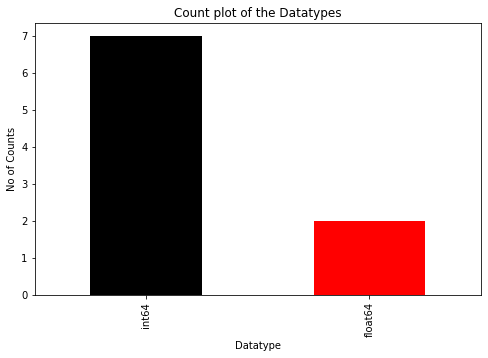

In [26]:
### Plotting the frequency plot descring the datatypes and the count of the variables.
plt.figure(figsize=(8,5))
df.dtypes.value_counts().plot(kind = 'bar',color = ['black','red'])
plt.title('Count plot of the Datatypes')
plt.xlabel('Datatype')
plt.ylabel('No of Counts')
plt.show()

<AxesSubplot:>

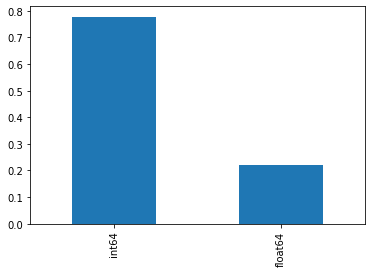

In [27]:
df.dtypes.value_counts(normalize=True).plot(kind = 'bar')

In [28]:
# Check the balance of the data by plotting the count of outcomes by their value. 
# Describe your findings and plan future course of action.

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
df.Outcome.value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

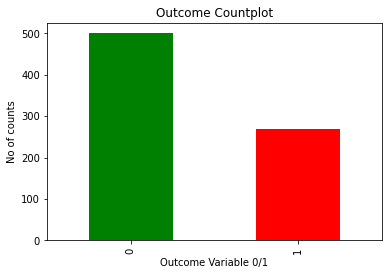

In [30]:
# Plotting the count of outcome

df.Outcome.value_counts().plot(kind = 'bar' , color = ['g','r'])
plt.title('Outcome Countplot')
plt.xlabel('Outcome Variable 0/1')
plt.ylabel('No of counts')
plt.show()

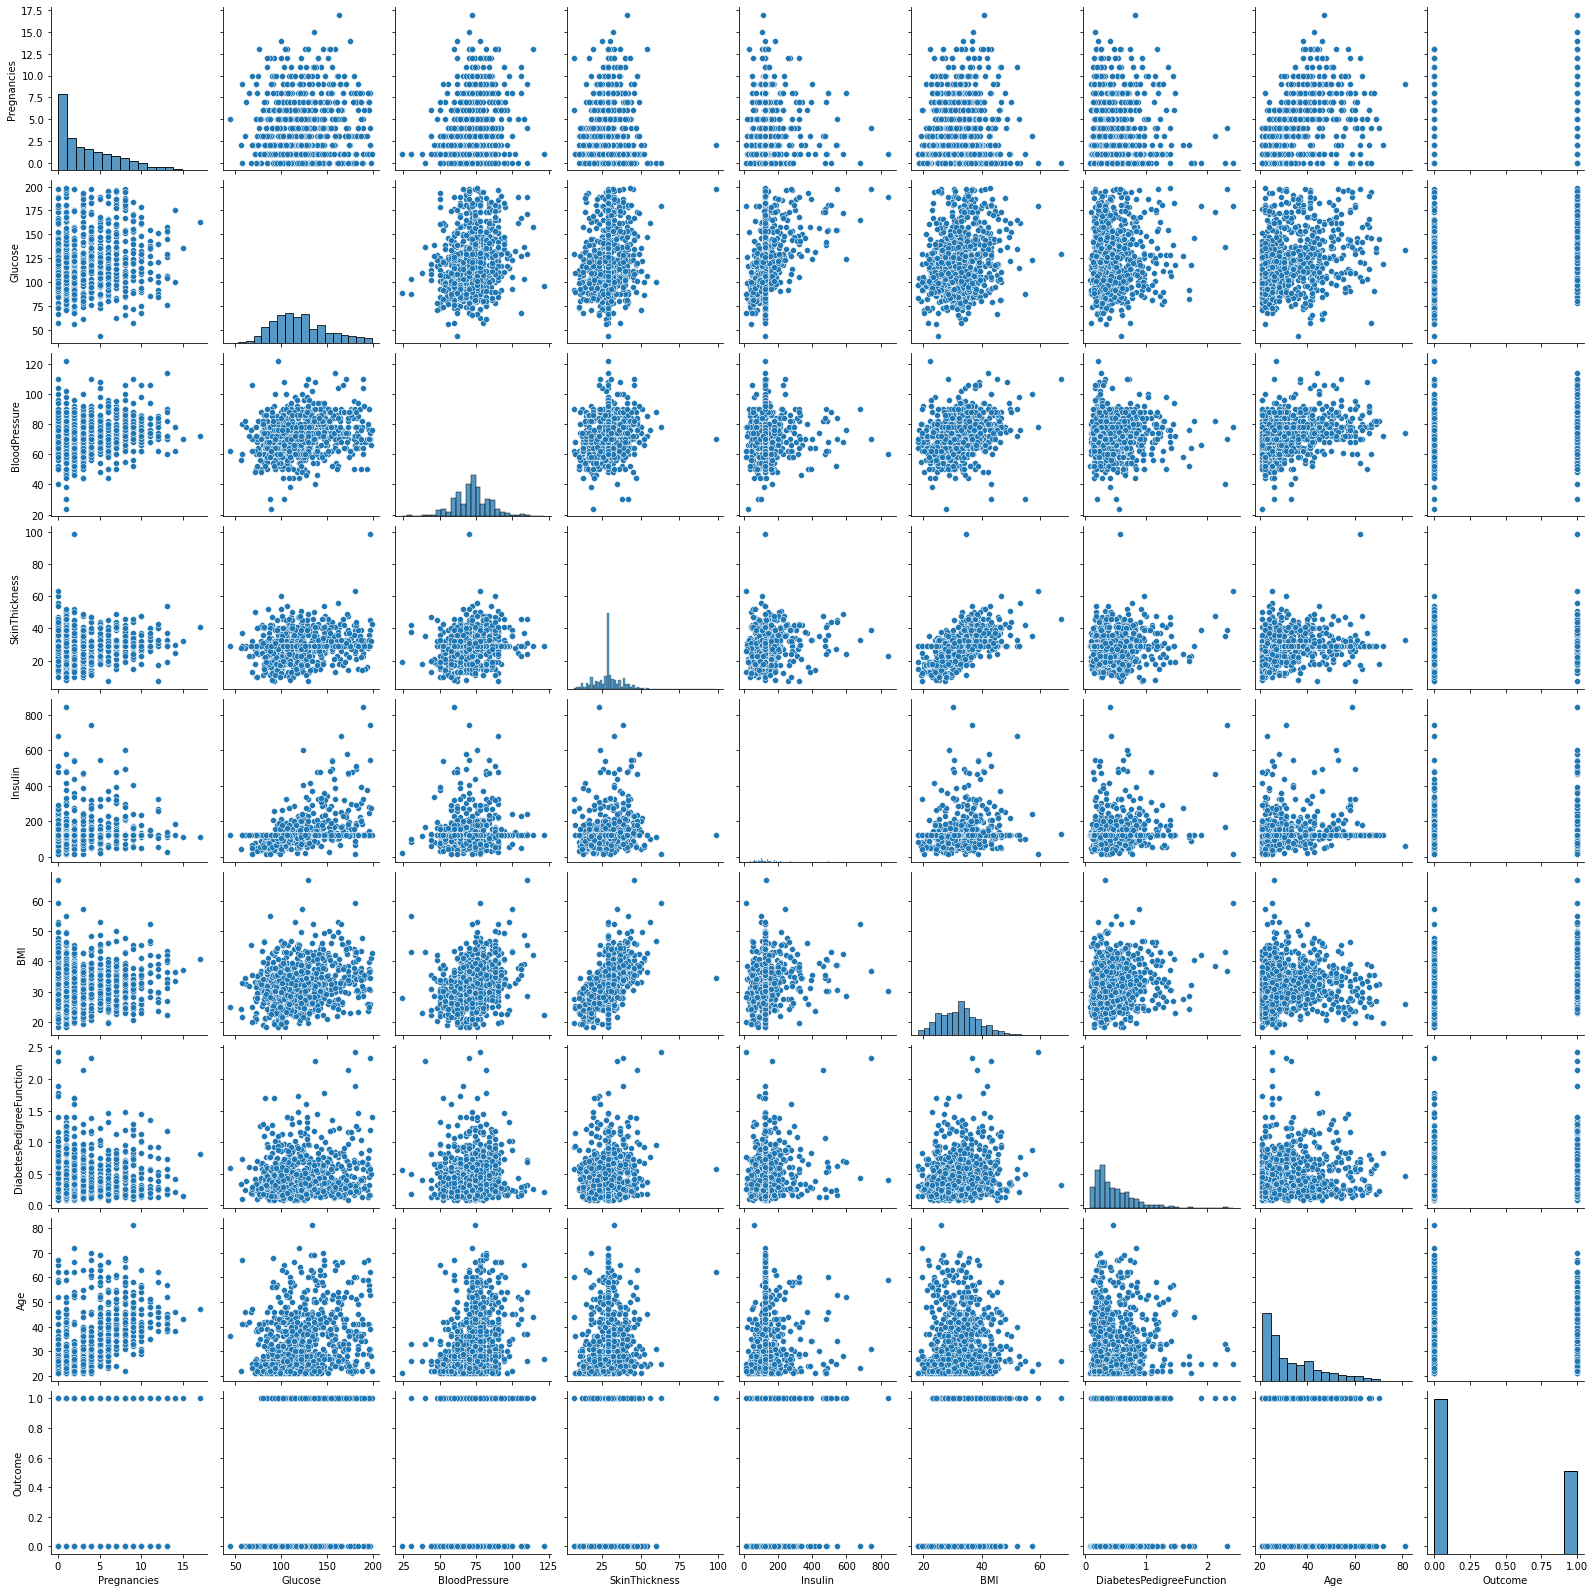

In [31]:
## Creating the Scatter plot between the variables to understand the relationships.

sns.pairplot(df)

##### There is a linear relationship between BMI and SkinThickness

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


<Figure size 360x360 with 0 Axes>

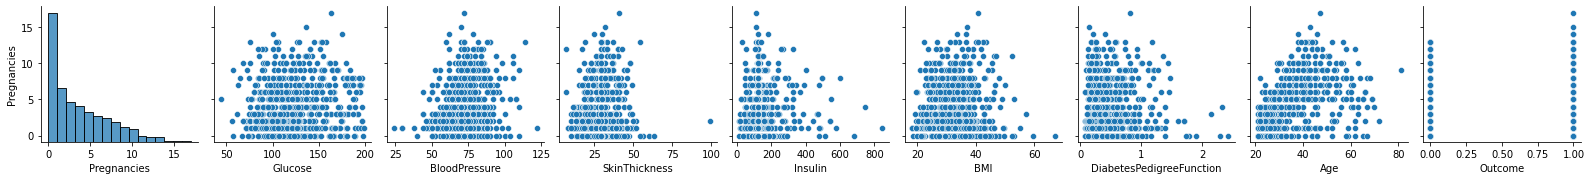

<Figure size 360x360 with 0 Axes>

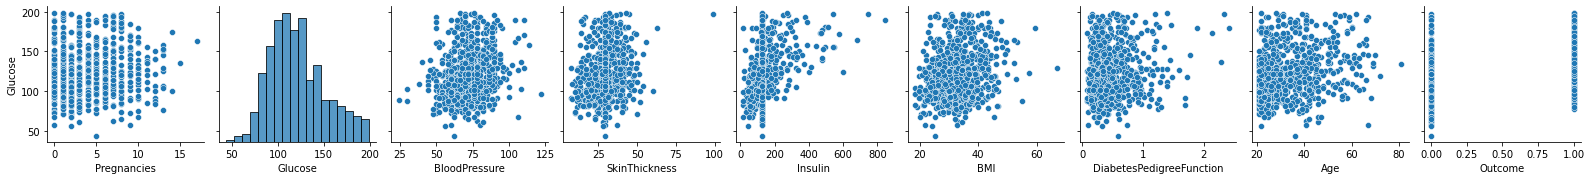

<Figure size 360x360 with 0 Axes>

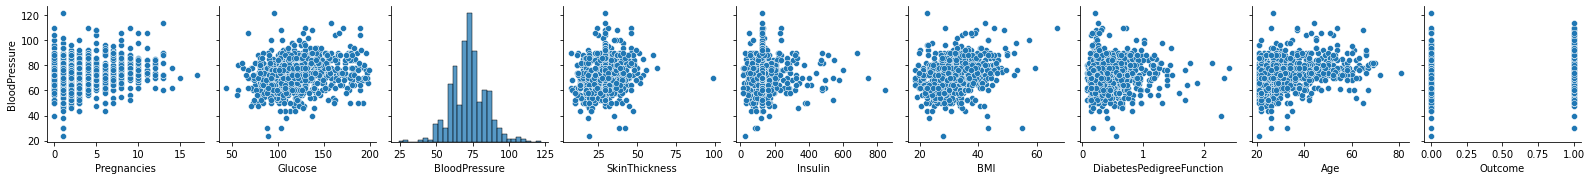

<Figure size 360x360 with 0 Axes>

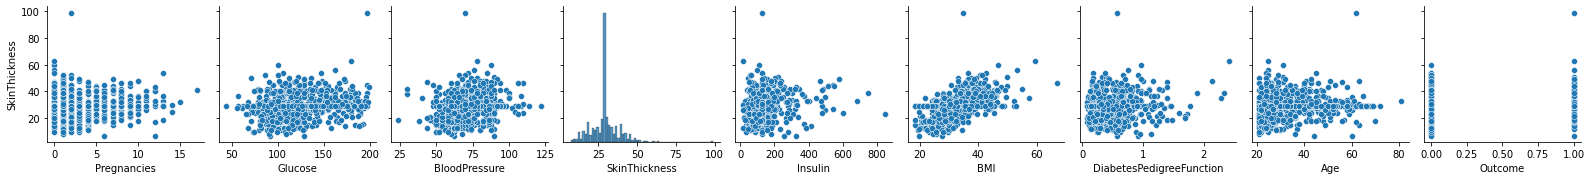

<Figure size 360x360 with 0 Axes>

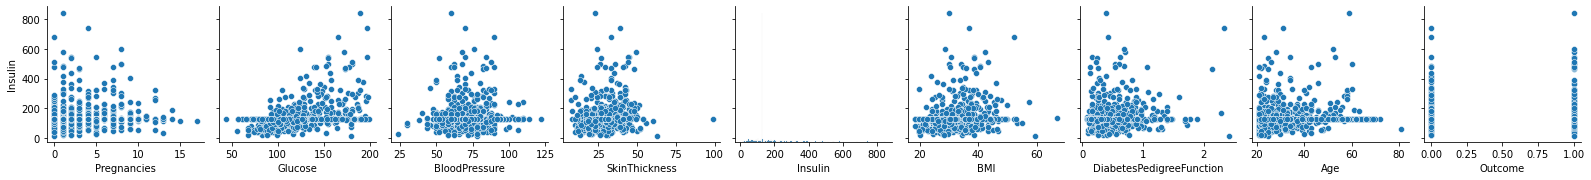

<Figure size 360x360 with 0 Axes>

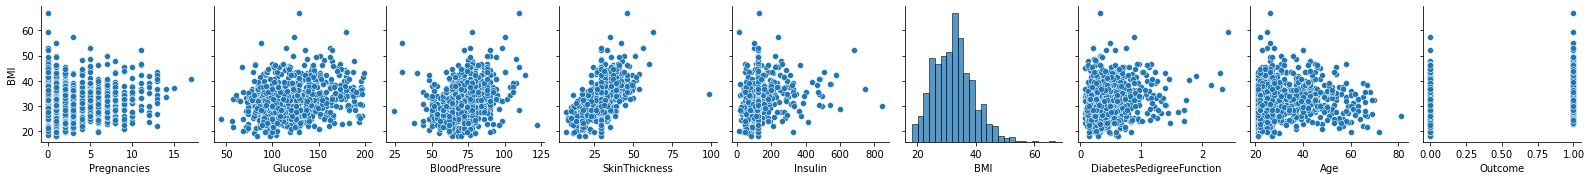

<Figure size 360x360 with 0 Axes>

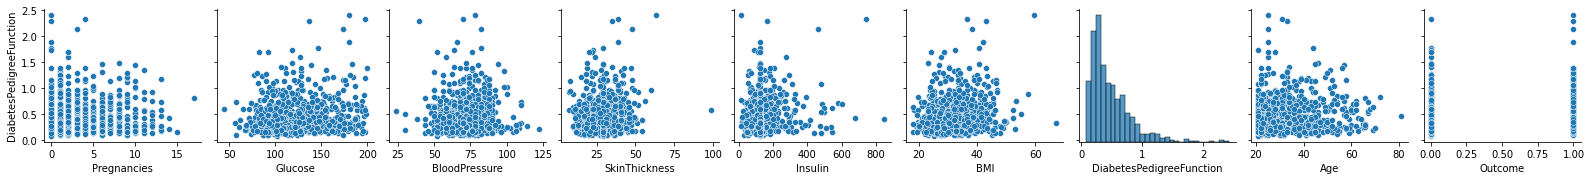

<Figure size 360x360 with 0 Axes>

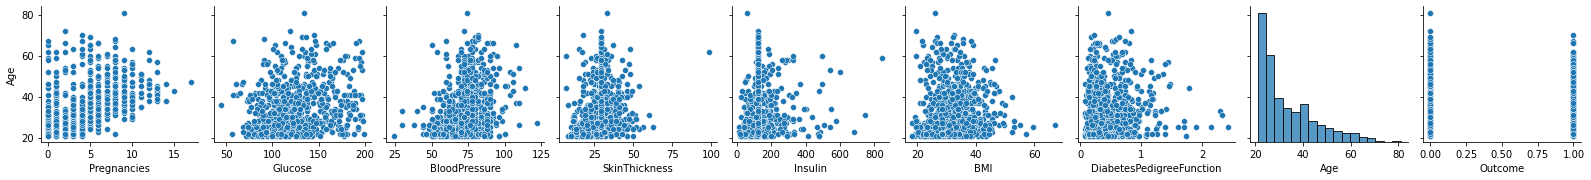

<Figure size 360x360 with 0 Axes>

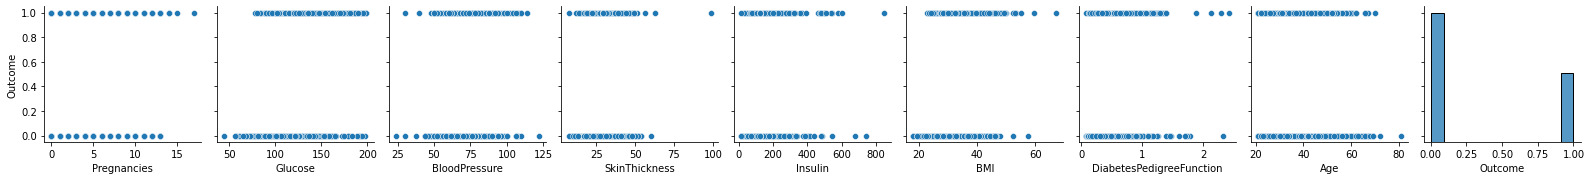

In [32]:
for i in df.columns:
    print(i)
    plt.figure(figsize=(5,5))
    sns.pairplot(y_vars = i,data = df)

##### By the pair plot we can see that there is no Glucose below 100 , BMI has chances to increase after 50 , Insulin becomes more above 600 , Blood pressure is low below 50
##### Also there is a relatinship between SkinThickness and disbetes Pedgree Function & BMI and Diabetes Pedgree Function.

In [33]:
df.corr().sort_values(by = 'Outcome' , ascending = False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723


##### By correlation it is clearly visible that BMI and SkinThickness has highest correlation and then Insulin and BMI and then bloodpressure and BMI has correlation among exploratory variables.Age and Blood Pressure also has amount of correlation.
##### Glucose has the highest correlation with Outcome.

<AxesSubplot:>

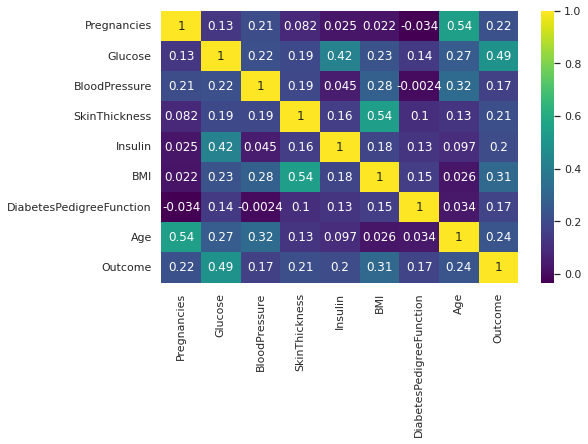

In [34]:
sns.set(rc=({'figure.figsize' :(8,5)}))
sns.heatmap(df.corr(),annot = True , cmap = 'viridis')

#### Green colour show the significant correlation among variables.

##### Since the Target variable is binary so the problem is classification problem in which we can build various models like logistic reegression , knn , decision tree , random forest , naive bayes , xgboost.

In [35]:
# Defining the Dependent and independent variable.
X = df.drop('Outcome',axis=1)
y = df.Outcome

In [36]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125,33.6,0.627,50
1,1,85,66,29,125,26.6,0.351,31


In [37]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state = 42,stratify = y)

In [39]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(576, 8) (192, 8) (576,) (192,)


#### KNearestNeighbor

In [40]:
### As KNN is distance based algorithim so standard scaling or min max scaling is necessary.

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#Initialising the minmax scaler
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train

array([[0.05882353, 0.45454545, 0.55102041, ..., 0.42535787, 0.07884187,
        0.11666667],
       [0.70588235, 0.22377622, 0.51020408, ..., 0.34969325, 0.13095768,
        0.45      ],
       [0.05882353, 0.36363636, 0.36734694, ..., 0.35378323, 0.14743875,
        0.05      ],
       ...,
       [0.05882353, 0.28671329, 0.46938776, ..., 0.40695297, 0.0596882 ,
        0.15      ],
       [0.52941176, 0.6993007 , 0.63265306, ..., 0.32924335, 0.4922049 ,
        0.35      ],
       [0.23529412, 0.61538462, 0.34693878, ..., 0.23108384, 0.09042316,
        0.26666667]])

In [44]:
X_test

array([[0.76470588, 0.33566434, 0.48979592, ..., 0.26584867, 0.16971047,
        0.28333333],
       [0.23529412, 0.4965035 , 0.65306122, ..., 0.33333333, 0.22895323,
        0.11666667],
       [0.11764706, 0.26573427, 0.53061224, ..., 0.27402863, 0.25167038,
        0.03333333],
       ...,
       [0.        , 0.34965035, 0.46938776, ..., 0.43353783, 0.23207127,
        0.01666667],
       [0.29411765, 0.47552448, 0.51020408, ..., 0.32310838, 0.06057906,
        0.28333333],
       [0.17647059, 0.5034965 , 0.48979592, ..., 0.29038855, 0.20712695,
        0.1       ]])

In [45]:
## Now Initialising the KNN

knn = KNeighborsClassifier(n_neighbors = 5)

In [46]:
model = knn.fit(X_train,y_train)

In [47]:
model

KNeighborsClassifier()

In [48]:
y_pred_knn = model.predict(X_test)

In [49]:
y_pred_knn

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [50]:
## Model accuracy.
confusion_matrix(y_test,y_pred_knn)

array([[104,  21],
       [ 29,  38]])

In [51]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       125
           1       0.64      0.57      0.60        67

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.74      0.74       192



In [52]:
model.score(X_train,y_train)

0.8315972222222222

In [53]:
model.score(X_test,y_test)

0.7395833333333334

In [54]:
knn_accuracy = accuracy_score(y_test,y_pred_knn)
knn_accuracy

0.7395833333333334

In [55]:
### Now finding the optimum no of neighbors and gridsearch cv for optimise model for more accuracy.
from sklearn.model_selection import KFold , cross_val_score , learning_curve

avg_score =[]
for i in range(2,35):
    kneighbor = KNeighborsClassifier(n_neighbors = i ,n_jobs = -1,metric = 'minkowski')
    kfold = KFold(n_splits = 10 , random_state = 1 , shuffle = True)
    knn_score = cross_val_score(kneighbor , X_train , y_train , cv = kfold , scoring = 'accuracy')
    avg_score.append(knn_score.mean())

In [56]:
avg_score

[0.7135813672111313,
 0.7483968542044768,
 0.7326981246218996,
 0.7605868118572292,
 0.7449183303085299,
 0.7554446460980035,
 0.7500907441016333,
 0.7587719298245614,
 0.7430732002419843,
 0.7587114337568058,
 0.758681185722928,
 0.7570780399274046,
 0.7656684815486993,
 0.7639443436176648,
 0.7656079854809438,
 0.7604355716878403,
 0.7639443436176648,
 0.7744404113732606,
 0.7587719298245613,
 0.7656987295825771,
 0.7656684815486993,
 0.7552631578947369,
 0.7639745916515427,
 0.7570175438596491,
 0.7603750756200847,
 0.7621899576527527,
 0.7655777374470659,
 0.7638838475499092,
 0.7673321234119783,
 0.7621899576527527,
 0.762129461584997,
 0.7656382335148215,
 0.7708408953418029]

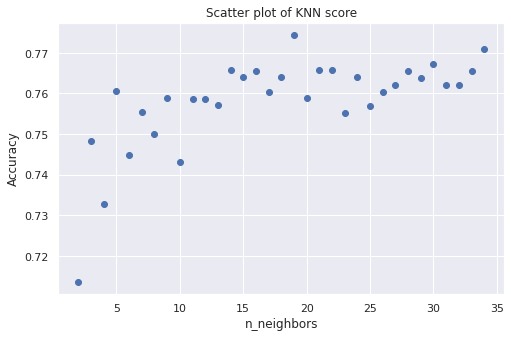

In [57]:
## Plotting the scatter plot for the knn score to get the maximum accuracy for the model.

plt.scatter(range(2,35),avg_score)
plt.title("Scatter plot of KNN score")
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks()
plt.grid(True)
plt.show()

##### We can see the at n_neighbors n=19 training accuracy reduced but test data accuracy got increased.But accuracy increment is not very much significant with increse of n_nighbors above n = 5 so we can use n_neighbors n=5 .
##### So Accuracy of KNN is 74% with sensitivity ---> Recall for class 1 -- 57% and Specificity for class ---> 0 83%

<Figure size 288x288 with 0 Axes>

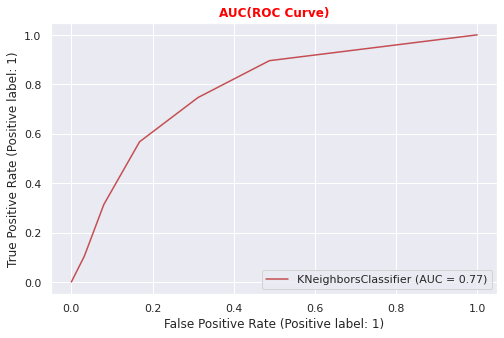

In [58]:
### AUC , ROC Curve for the same :

from sklearn import metrics
plt.figure(figsize = (4,4))
metrics.plot_roc_curve(model,X_test,y_test,color = 'r')
plt.title('AUC(ROC Curve)',weight = 'bold' , color = 'red')
plt.grid(True)

In [59]:
## Now Checking the Other Models to compare with KNN.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Logistic Regression

In [60]:
logreg = LogisticRegression()

In [61]:
model_logreg = logreg.fit(X_train,y_train)
model_logreg

LogisticRegression()

In [62]:
y_pred_logreg = model_logreg.predict(X_test)
y_pred_logreg

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [63]:
model_logreg.score(X_train,y_train)

0.7829861111111112

In [64]:
model_logreg.score(X_test,y_test)

0.7239583333333334

In [65]:
logreg_accuracy = accuracy_score(y_test,y_pred_logreg)
logreg_accuracy

0.7239583333333334

##### Accuracy of logistic regression is 72.39%

In [66]:
confusion_matrix(y_test,y_pred_logreg)

array([[105,  20],
       [ 33,  34]])

In [67]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       125
           1       0.63      0.51      0.56        67

    accuracy                           0.72       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.72      0.72       192



In [68]:
print("Sensitivity --- Recall for Class - 1 ---> 51%")
print("Specificity --- Recall for class - 0 ---> 84%")

Sensitivity --- Recall for Class - 1 ---> 51%
Specificity --- Recall for class - 0 ---> 84%


#### Naive Bayes

In [69]:
NB = GaussianNB()

In [70]:
model_nb = NB.fit(X_train,y_train)
model_nb

GaussianNB()

In [71]:
y_pred_nb = model_nb.predict(X_test)

In [72]:
y_pred_nb

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [73]:
confusion_matrix(y_test,y_pred_nb)

array([[97, 28],
       [25, 42]])

In [74]:
model_nb.score(X_train,y_train)

0.7638888888888888

In [75]:
model_nb.score(X_test,y_test)

0.7239583333333334

In [76]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)
accuracy_nb

0.7239583333333334

In [77]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       125
           1       0.60      0.63      0.61        67

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.73      0.72      0.73       192



In [78]:
print("Sensitivity --- Recall for Class - 1 ---> 63 %")
print("Specificity --- Recall for class - 0 ---> 78 %")

Sensitivity --- Recall for Class - 1 ---> 63 %
Specificity --- Recall for class - 0 ---> 78 %


##### Accuracy of Gaussian NB is 72.39 % 

#### Decision Tree

In [79]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_split =  25)

In [80]:
model_dt = DT.fit(X_train,y_train)
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=25)

In [81]:
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [82]:
model_dt.score(X_train,y_train)

0.8333333333333334

In [83]:
model_dt.score(X_test,y_test)

0.765625

In [84]:
confusion_matrix(y_test,y_pred_dt)

array([[114,  11],
       [ 34,  33]])

In [85]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       125
           1       0.75      0.49      0.59        67

    accuracy                           0.77       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.76      0.77      0.75       192



In [190]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.765625

[Text(0.4955357142857143, 0.9375, 'X[1] <= 0.535\nentropy = 0.933\nsamples = 576\nvalue = [375, 201]'),
 Text(0.22321428571428573, 0.8125, 'X[5] <= 0.178\nentropy = 0.73\nsamples = 397\nvalue = [316, 81]'),
 Text(0.10714285714285714, 0.6875, 'X[4] <= 0.045\nentropy = 0.086\nsamples = 93\nvalue = [92, 1]'),
 Text(0.07142857142857142, 0.5625, 'entropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.14285714285714285, 0.5625, 'entropy = 0.0\nsamples = 84\nvalue = [84, 0]'),
 Text(0.3392857142857143, 0.6875, 'X[7] <= 0.142\nentropy = 0.831\nsamples = 304\nvalue = [224, 80]'),
 Text(0.21428571428571427, 0.5625, 'X[5] <= 0.556\nentropy = 0.562\nsamples = 167\nvalue = [145, 22]'),
 Text(0.17857142857142858, 0.4375, 'X[6] <= 0.19\nentropy = 0.486\nsamples = 161\nvalue = [144, 17]'),
 Text(0.10714285714285714, 0.3125, 'X[0] <= 0.441\nentropy = 0.28\nsamples = 103\nvalue = [98, 5]'),
 Text(0.07142857142857142, 0.1875, 'X[6] <= 0.075\nentropy = 0.194\nsamples = 100\nvalue = [97, 3]'),
 Text(0.035

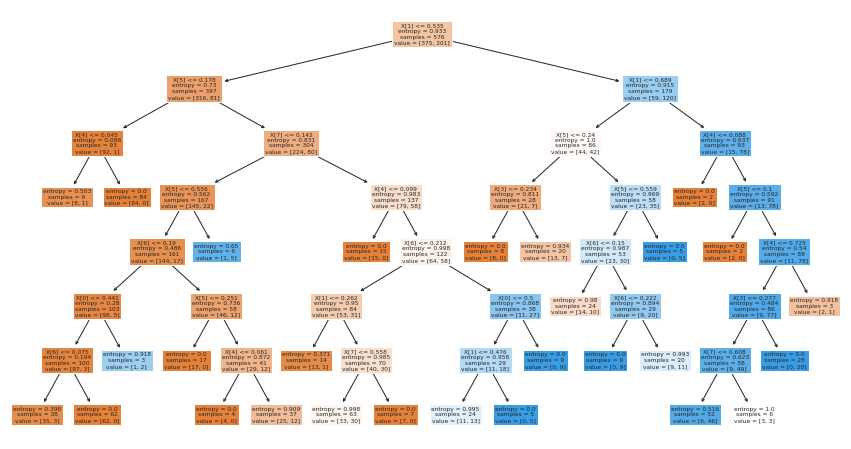

In [198]:
from sklearn import tree
plt.figure(figsize = (15,8))
tree.plot_tree(model_dt , filled = True)

##### Accuracy of The Decision Tree is 76.5 % with best parameters of grid search CV. 

##### Lets Look for GridSearch CV for optimize the accuracy of Decision Tree 
#### GridSearchCV

In [87]:
from sklearn.model_selection import GridSearchCV
pgrid = {'criterion' : ['gini','entropy'] , 'min_samples_split' : range(5,30,2) , 'max_depth' : range(5,30,2)}


In [88]:
gridsearch = GridSearchCV(estimator = DT , param_grid = pgrid , cv = 5 , scoring = 'accuracy' , n_jobs = -1)
gridsearch

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              min_samples_split=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30, 2),
                         'min_samples_split': range(5, 30, 2)},
             scoring='accuracy')

In [89]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              min_samples_split=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30, 2),
                         'min_samples_split': range(5, 30, 2)},
             scoring='accuracy')

In [90]:
gridsearch.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [91]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 7}

#### Random Forest

In [92]:
rfc = RandomForestClassifier(n_estimators = 50 , criterion = 'entropy' , max_depth = 10 , min_samples_split = 15)

In [93]:
model_rfc = rfc.fit(X_train,y_train)
model_rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=15,
                       n_estimators=50)

In [94]:
y_pred_rfc = model_rfc.predict(X_test)
y_pred_rfc

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [95]:
confusion_matrix(y_test,y_pred_rfc)

array([[110,  15],
       [ 30,  37]])

In [96]:
model_rfc.score(X_train,y_train)

0.9079861111111112

In [97]:
model_rfc.score(X_test,y_test)

0.765625

In [98]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       125
           1       0.71      0.55      0.62        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



In [99]:
accuracy_score(y_test,y_pred_rfc)

0.765625

##### Accuracy of Random Forest is 76.5 % 

#### GridSearchCV_RFC

In [100]:
pgrid_rfc = {'n_estimators' : range(5,100,5) , 'criterion' : ['gini','entropy'] , 'min_samples_split' : range(5,30,5) , 'max_depth' : range(5,30,5)}

In [101]:
pgrid

{'criterion': ['gini', 'entropy'],
 'min_samples_split': range(5, 30, 2),
 'max_depth': range(5, 30, 2)}

In [102]:
gridsearch_rfc = GridSearchCV(estimator = rfc , param_grid = pgrid_rfc , cv = 5 , scoring = 'accuracy' , n_jobs = -1)

In [103]:
gridsearch_rfc

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=15,
                                              n_estimators=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_split': range(5, 30, 5),
                         'n_estimators': range(5, 100, 5)},
             scoring='accuracy')

In [104]:
gridsearch_rfc.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=15,
                                              n_estimators=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30, 5),
                         'min_samples_split': range(5, 30, 5),
                         'n_estimators': range(5, 100, 5)},
             scoring='accuracy')

In [105]:
gridsearch_rfc.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [106]:
gridsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 20,
 'n_estimators': 20}

#### XGBoost Classifier

In [107]:
from xgboost import XGBClassifier

In [108]:
xgb = XGBClassifier(n_estimators = 17 , n_jobs = -1 , random_state = 1)

In [109]:
model_xgb = xgb.fit(X_train , y_train)
model_xgb

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=17, n_jobs=-1, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [110]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [111]:
model_xgb.score(X_train,y_train)

0.9652777777777778

In [112]:
model_xgb.score(X_test,y_test)

0.7760416666666666

In [113]:
confusion_matrix(y_test,y_pred_xgb)

array([[107,  18],
       [ 25,  42]])

In [114]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       125
           1       0.70      0.63      0.66        67

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.77      0.78      0.77       192



In [115]:
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
accuracy_xgb

0.7760416666666666

#### Accuracy of XGBoost Algorithim is 77.6%

In [116]:
### Kfold cross validatin for XGBoost algorithim.

avg_score_xgb = []
for k in range(2,30):
    cv = KFold(n_splits = 10 , random_state = 7 , shuffle = True)
    xgbmodel = XGBClassifier(n_estimators = k , random_state = 7)
    xgb_score = cross_val_score(xgbmodel , X_train , y_train , cv = cv , scoring = 'accuracy')
    avg_score_xgb.append(xgb_score.mean())
    

In [117]:
avg_score_xgb

[0.7309134906231095,
 0.7482758620689655,
 0.7394736842105264,
 0.7309134906231096,
 0.7410768300060495,
 0.7411373260738052,
 0.7480943738656987,
 0.7429522081064731,
 0.746400483968542,
 0.7464307320024198,
 0.7499395039322444,
 0.7516031457955233,
 0.7498790078644888,
 0.7549606775559589,
 0.7532365396249243,
 0.7567150635208711,
 0.7584694494857834,
 0.7550211736237145,
 0.7497882637628555,
 0.7584694494857834,
 0.7515124016938899,
 0.7567150635208713,
 0.7463097398669086,
 0.751482153660012,
 0.7619479733817303,
 0.7584996975196614,
 0.7550211736237145,
 0.7550514216575922]

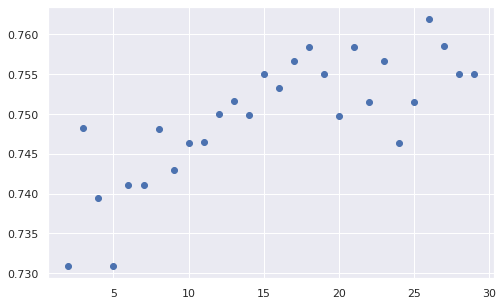

In [118]:
plt.scatter(range(2,30),avg_score_xgb)

#### SVM Algorithim

In [137]:
svc = SVC(C = 500 , kernel = 'rbf' , gamma = 0.1)

In [138]:
model_svc = svc.fit(X_train,y_train)
model_svc

SVC(C=500, gamma=0.1)

In [139]:
y_pred_svc = model_svc.predict(X_test)
y_pred_svc

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [140]:
confusion_matrix(y_test,y_pred_svc)

array([[110,  15],
       [ 34,  33]])

In [141]:
model_svc.score(X_train,y_train)

0.8020833333333334

In [142]:
model_svc.score(X_test,y_test)

0.7447916666666666

In [143]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       125
           1       0.69      0.49      0.57        67

    accuracy                           0.74       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.74      0.73       192



In [145]:
accuracy_score(y_test,y_pred_svc)

0.7447916666666666

##### Accuracy of SVC is 74.4 % with grid search CV

##### GridSearchCV_SVM

In [147]:
pgrid_svc = {'C' : [0.1,1,10,100,500,1000] , 'gamma' : [1,0.1,0.01,0.001,0.0001] , 'kernel' : ['rbf']}

In [148]:
gridsearch_svc = GridSearchCV(estimator = svc , param_grid = pgrid_svc , cv = 5 , refit = True , verbose = 3)

In [149]:
gridsearch_svc.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.774 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(C=500, gamma=0.1),
             param_grid={'C': [0.1, 1, 10, 100, 500, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [150]:
gridsearch_svc.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [151]:
gridsearch_svc.best_params_

{'C': 500, 'gamma': 0.1, 'kernel': 'rbf'}

In [152]:
gridsearch_svc.best_estimator_

SVC(C=500, gamma=0.1)

#### Accuracy Comparison of All Models/Algorithims

In [165]:
### Creating a dataframe for it.

Accuracy_Models = {'KNearest Neighbor' : knn_accuracy*100 ,'Logistic Regression' : logreg_accuracy*100 , 'Naive Bayes' : accuracy_nb*100 , 'Decision Tree' : accuracy_dt*100 , 'Random Forest' : accuracy_score(y_test,y_pred_rfc)*100 , 'XG Boost' : accuracy_xgb*100 , 'Support Vector Machine' : accuracy_score(y_test,y_pred_svc)*100}

In [189]:
pd.DataFrame([Accuracy_Models]).T.reset_index().rename(columns = {'index' :'Models',   0 : 'Models Accuracy Comparison'})

,Models,Models Accuracy Comparison
0,KNearest Neighbor,73.958333
1,Logistic Regression,72.395833
2,Naive Bayes,72.395833
3,Decision Tree,76.562500
4,Random Forest,76.562500
5,XG Boost,77.604167
6,Support Vector Machine,74.479167


#### On Comparison with  KNN Alrogithim we find Logistic Regression , Naive Bayes , Support Vector Machine has less accuracy and Decision Tree , Random Forest , XG Boost has more Accuracy as compare to KNN.

#### XG Boost has highest accuracy.

### END